In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Akshitha/New folder/Meachine_learning_pratice/archive (4).zip")

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.drop(columns=["Access_to_Resources", "Extracurricular_Activities", "Motivation_Level", "Internet_Access"], inplace=True)

In [5]:
df.drop(columns=["Tutoring_Sessions", "Tutoring_Sessions", "Peer_Influence", "Physical_Activity"], inplace=True)

In [6]:
df.drop(columns=["Teacher_Quality"], inplace=True)

In [7]:
df.drop(columns=["Parental_Involvement"], inplace=True)

In [8]:
df.drop(columns=["Learning_Disabilities", "Parental_Education_Level", "Distance_from_Home"], inplace=True, errors='ignore')

<Axes: ylabel='Exam_Score'>

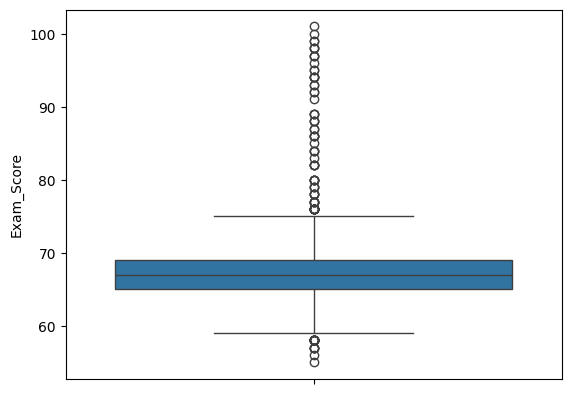

In [9]:
import seaborn as sns # Hours_Studied, Exam_score
sns.boxplot(df["Exam_Score"])

In [10]:
q1 = df.describe()["Hours_Studied"]["25%"]
q3 = df.describe()["Hours_Studied"]["75%"]
iqr = q3 - q1
lower_limit = q1 -1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [11]:
df["Hours_Studied"].clip(lower_limit,upper_limit, inplace=True)

C:\Users\Akshitha\AppData\Local\Temp\ipykernel_19840\1687344623.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hours_Studied"].clip(lower_limit,upper_limit, inplace=True)


In [12]:
q1 = df.describe()["Exam_Score"]["25%"]
q3 = df.describe()["Exam_Score"]["75%"]
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [13]:
df["Exam_Score"].clip(lower_limit,upper_limit, inplace=True)

C:\Users\Akshitha\AppData\Local\Temp\ipykernel_19840\970302717.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Exam_Score"].clip(lower_limit,upper_limit, inplace=True)


In [14]:
df["Family_Income"].value_counts()

Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

In [15]:
d1 = {"Low":0, "Medium":1, "High":2}
df["Family_Income"] = df["Family_Income"].map(d1)

In [16]:
df["School_Type"].value_counts()

School_Type
Public     4598
Private    2009
Name: count, dtype: int64

In [17]:
d2 = {"Public":0, "Private":1}
df["School_Type"] = df["School_Type"].map(d2)

In [18]:
d3 = {"Male":0, "Female":1}
df["Gender"] = df["Gender"].map(d3)

In [19]:
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Family_Income,School_Type,Gender,Exam_Score
0,23,84,7,73,0,0,0,67
1,19,64,8,59,1,0,1,61
2,24,98,7,91,1,0,0,74
3,29,89,8,98,1,0,0,71
4,19,92,6,65,1,0,1,70


In [20]:
x = df.drop(columns=["Exam_Score"])
y = df["Exam_Score"]

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [22]:
x_train.shape

(5285, 7)

In [23]:
x_test.shape

(1322, 7)

In [24]:
y_train.shape

(5285,)

In [25]:
y_test.shape

(1322,)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [27]:
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(x_test)

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)

In [30]:
rmse = np.sqrt(mse)

In [31]:
rmse

np.float64(1.7345754776270137)

In [32]:
import joblib
joblib.dump(lr, "Exam_Score.pkl")

['Exam_Score.pkl']

In [33]:
%%capture
pip install streamlit